#Import

In [34]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import torch
import torch.nn as nn # neural network
import torch.nn.functional as F
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, chi2,f_classif,RFE
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
#precision_score, recall_score, f1_score, roc_curve, roc_auc_score, balanced_accuracy_scor


#Importing Data

In [36]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print("The shape of Train datset is ",df.shape)
print("The shape of Test datset is ",df_test.shape)

#df.head()

The shape of Train datset is  (103904, 25)
The shape of Test datset is  (25976, 25)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [38]:
df.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [39]:
# Checking for duplicates
df.duplicated().sum()

# There are no duplicates in dataset

0

In [40]:
#Checking for null Values
df.isnull().sum()
#There are 310 null values in arrival delay in minutes

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [41]:
#Target Variable satisfaction

#  There are two types of output variables 'neutral or dissatisfied  mapped to 0 and 'satisfied' mapped to 1
print('The distribution of output variable is ')

print(df['satisfaction'].value_counts())

# #We observe the dataset is balnced hence there is no need to balance the dataset
df['satisfaction'] =df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

The distribution of output variable is 
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [42]:
#Dropping the xtra columns
#df.drop(columns = ['id','Unnamed: 0','satisfaction'],inplace = True)
df.drop(columns = ['id','Unnamed: 0'],inplace = True)
print("The shape of datset is ",df.shape)

The shape of datset is  (103904, 23)


# EDA

## Using Pandas Profiling

In [43]:
# pip install pandas-profiling

##Categorical feature

In [44]:
#Separting the  categorical variables
df_cat = df[['Gender','Customer Type','Class','Type of Travel','satisfaction']]
df_cat

,Gender,Customer Type,Class,Type of Travel,satisfaction
0,Male,Loyal Customer,Eco Plus,Personal Travel,0
1,Male,disloyal Customer,Business,Business travel,0
2,Female,Loyal Customer,Business,Business travel,1
3,Female,Loyal Customer,Business,Business travel,0
4,Male,Loyal Customer,Business,Business travel,1
...,...,...,...,...,...
103899,Female,disloyal Customer,Eco,Business travel,0
103900,Male,Loyal Customer,Business,Business travel,1
103901,Male,disloyal Customer,Business,Business travel,0
103902,Female,disloyal Customer,Eco,Business travel,0


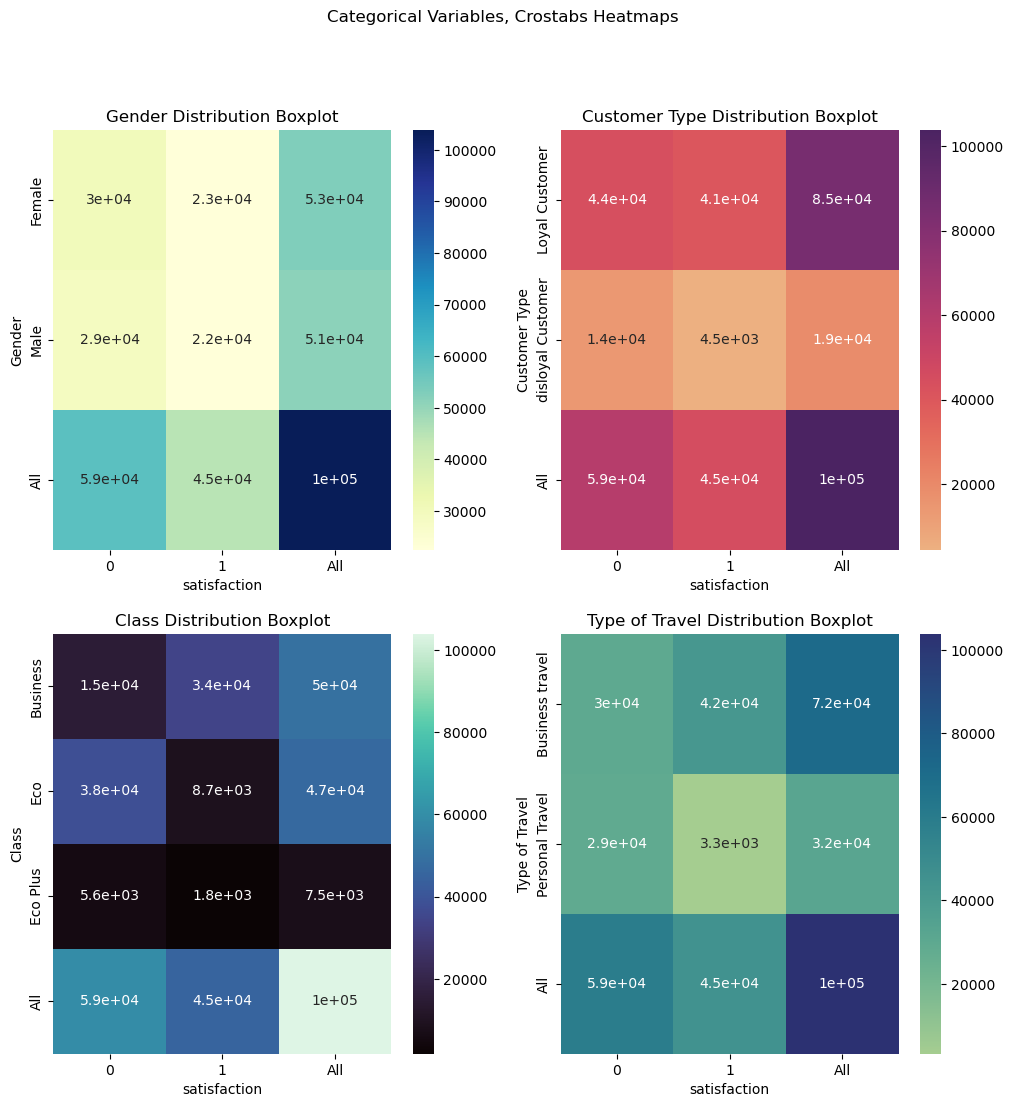

In [45]:

fig, axes = plt.subplots(2, 2, figsize=(12,12 ))
fig.suptitle('Categorical Variables, Crostabs Heatmaps')


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Gender'],df['satisfaction'], margins=True, values=df_cat['satisfaction'], aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, ax = axes[0,0])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[0,0].set_title("Gender Distribution Boxplot" )


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Customer Type'],df['satisfaction'], margins=True, values=df_cat['satisfaction'], aggfunc=pd.Series.count),
            cmap="flare", annot=True, ax = axes[0,1])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[0,1].set_title("Customer Type Distribution Boxplot" )


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Class'],df['satisfaction'], margins=True, values=df_cat['satisfaction'], aggfunc=pd.Series.count),
            cmap="mako", annot=True ,ax = axes[1,0])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[1,0].set_title("Class Distribution Boxplot" )


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Type of Travel'],df['satisfaction'], margins=True, values=df_cat['satisfaction'], aggfunc=pd.Series.count),
            cmap="crest", annot=True,ax = axes[1,1])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[1,1].set_title("Type of Travel Distribution Boxplot" )



plt.show()
#Obs
#For Gender there is no bias for satisfaction as the male female heatmaps are similar
#A customer who is loyal has more expectations from the flight if is not as per standrads he is 75% more likely to leave a 0 
#Passengers in Economy class leave a 0 as compared other two classes
# Passenegr who travels by BUssines class belongs  80% of satisfied custoemrs
# Type of travel has no effect on dis satisfaction, on the Contarry When people travel by Bussines travel reason  class they 95% 
#more satisfied then fellow paasengers traveling in personal travle reason

#Numerical Feature

<AxesSubplot:>

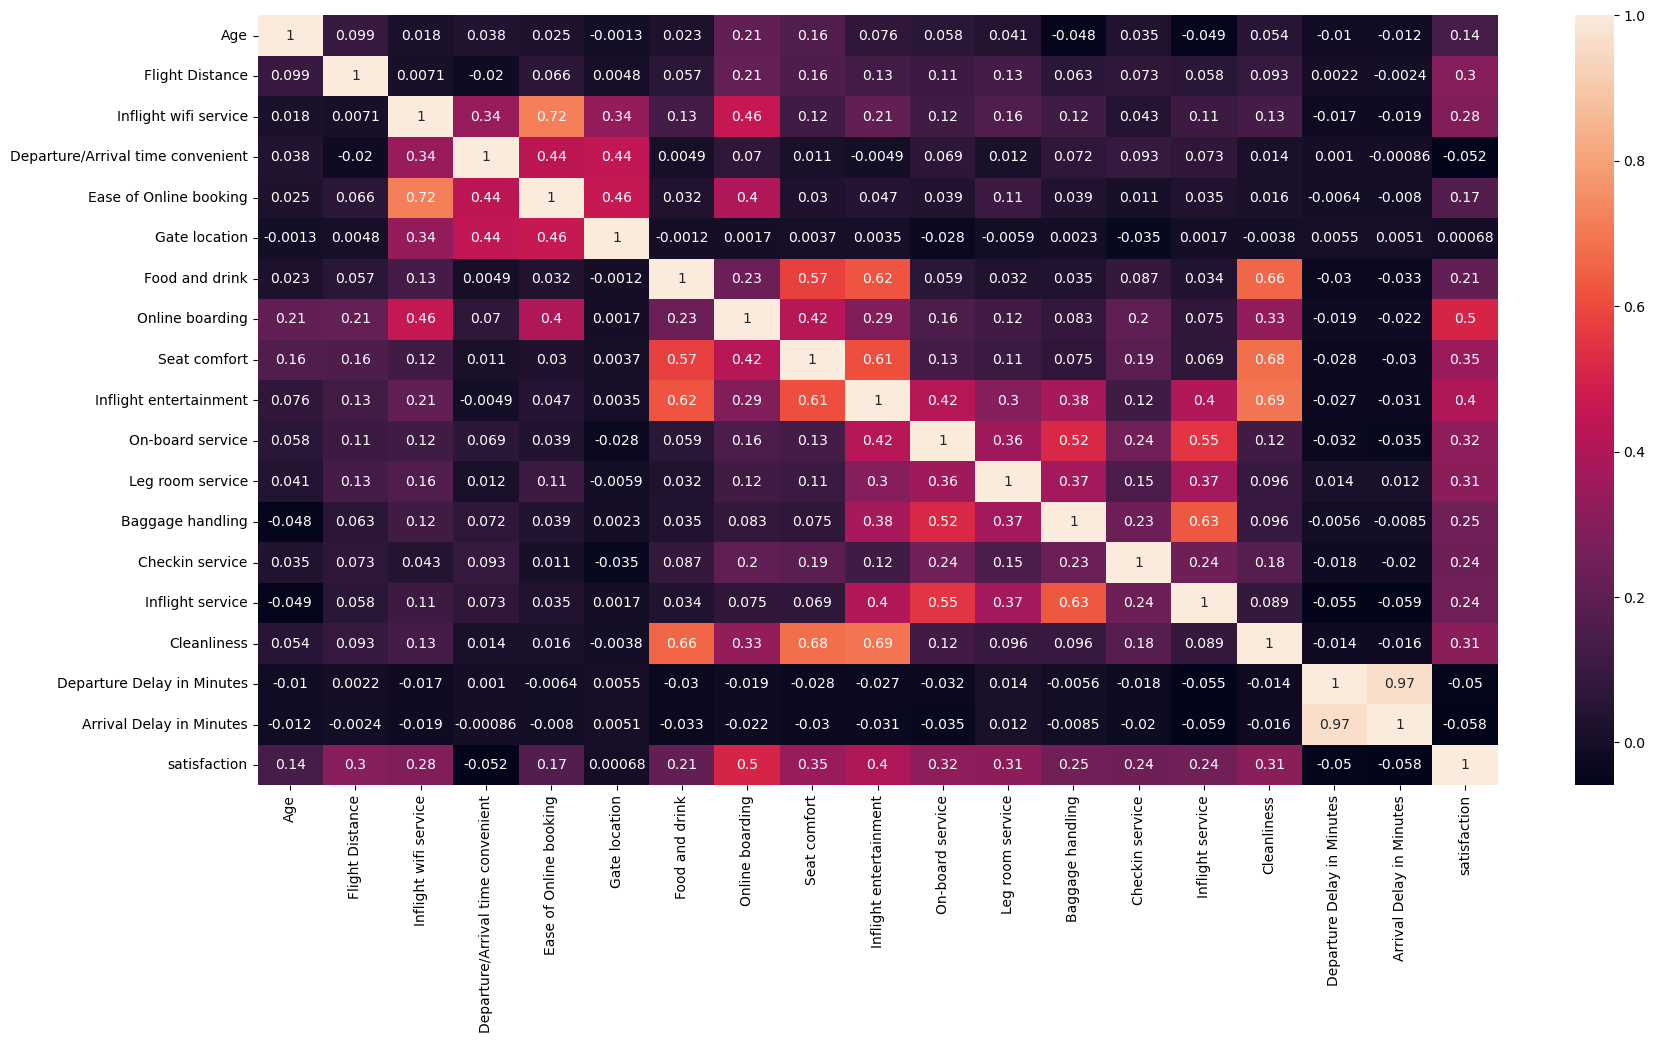

In [46]:
df_num = df.drop(['Gender','Customer Type','Class','Type of Travel'], axis = 1)

plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True)

#Obs We can remove 'Arrival Delay in Minutes' as it is higly correletd with Deoarture dealy in minutes, 
#we dropped this column btw two as it ihas null vlaues so solve the problem of null values

In [47]:
df.drop(columns = ['Arrival Delay in Minutes'],inplace = True)

In [48]:
len(df_num.columns)

19

In [49]:
#Checking Correlation of each features with Satisfaction variable

# df_num.corrwith(df_num["satisfaction"], axis =0, method= "pearson").plot(kind='bar')

#Obseravtion Online boarding and Inflight entertainment are two most correlated features with satisfaction

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>],
       [<AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>],
       [<AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>],
       [<AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Inflight service'}>,
        <AxesSubplot:title={'center':'Cleanliness'}>],
       [<AxesSubplot:title={'center':'Departure 

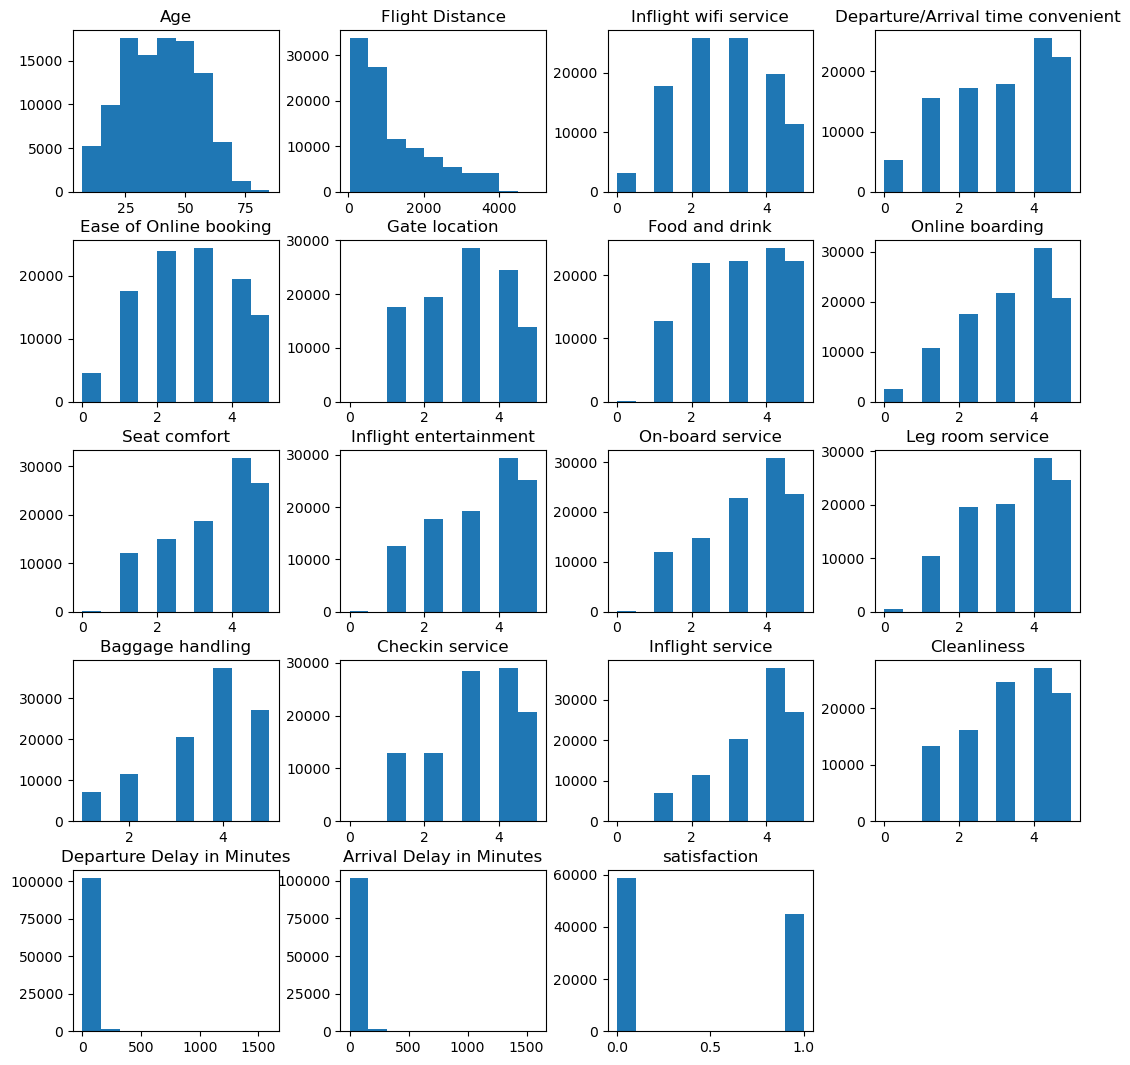

In [50]:
df_num.hist(grid=False,figsize=(13,13))
#Observation MOst of the feature  have values ranging from 1 to 5

# We need to check for outlier for Age, Flight distance, and departure in delay minutes 

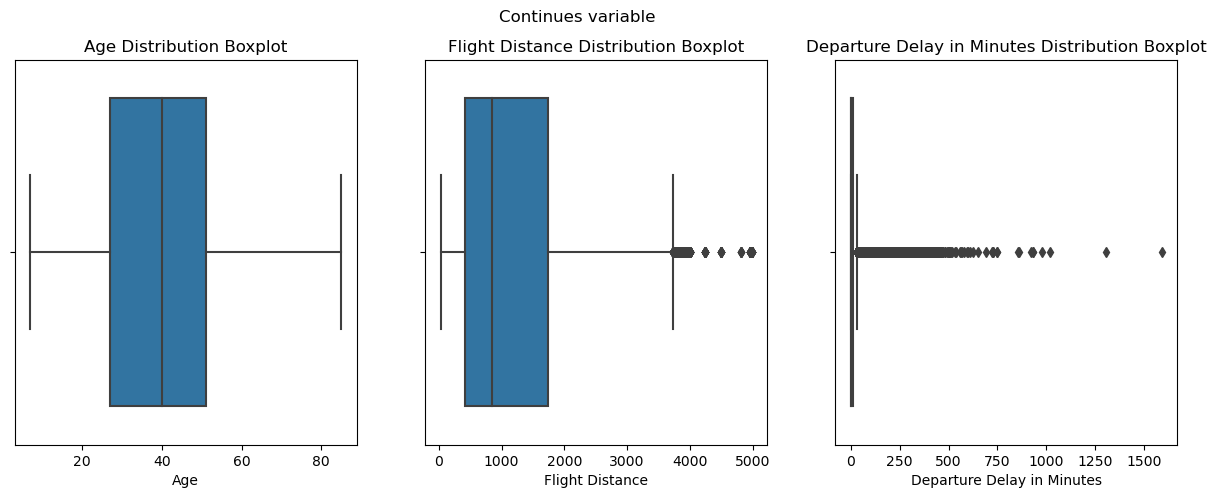

In [51]:
# We need to check for outlier for Age, Flight distance, and Departure Delay in Minutes 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Continues variable')


#create boxplot in each subplot
sns.boxplot( x=df_num['Age'], ax=axes[0])
axes[0].set_title("Age Distribution Boxplot" )

sns.boxplot( x=df_num['Flight Distance'], ax=axes[1])
axes[1].set_title('Flight Distance Distribution Boxplot')

sns.boxplot( x=df_num['Departure Delay in Minutes'], ax=axes[2])
axes[2].set_title('Departure Delay in Minutes Distribution Boxplot')


plt.show()
# obs: age has not outlier as for flight distance we will remove values > 4000 and departure in delay 300 min ie 1 hours

In [52]:
#Filtering the dataset in deparute delay less than 1 hour and flight distnace < 4000 as they are outliers

df = df[(df['Departure Delay in Minutes']  < 60) & (df['Flight Distance'] < 4000)]
df.shape

(96446, 22)

In [53]:
#The flight distance is skewed so we use log transform to convert it

df['Flight Distance'] = np.log1p(df['Flight Distance'])

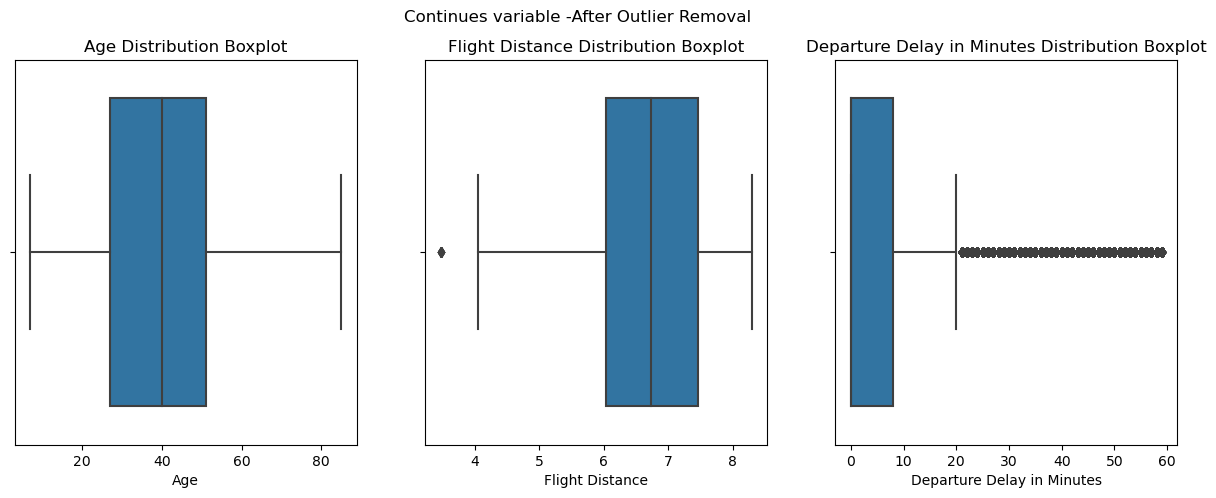

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Continues variable -After Outlier Removal')


#create boxplot in each subplot
sns.boxplot( x=df['Age'], ax=axes[0])
axes[0].set_title("Age Distribution Boxplot" )

sns.boxplot( x=df['Flight Distance'], ax=axes[1])
axes[1].set_title('Flight Distance Distribution Boxplot')

sns.boxplot( x=df['Departure Delay in Minutes'], ax=axes[2])
axes[2].set_title('Departure Delay in Minutes Distribution Boxplot')


plt.show()

In [55]:
df[df['Departure Delay in Minutes'] < 20].shape

(83651, 22)

In [56]:
#After Explotory Data Analysis and Cleaning we have our final data ready for feature Engeinring

print('The shape of data after cleaning is ',df.shape)

The shape of data after cleaning is  (96446, 22)


#Feature Engineering

In [57]:
df.shape

(96446, 22)

In [58]:
y = df['satisfaction']
df.drop(columns = ['satisfaction'],inplace = True)
df.shape

(96446, 21)

In [59]:
#Test Dataset
df_test = pd.read_csv('test.csv')
print("Shape of test",df_test.shape)

df_test['satisfaction'] =df_test['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

y_ts = df_test['satisfaction']
df_test.drop(columns = ['satisfaction','Unnamed: 0', 'id','Arrival Delay in Minutes'],inplace = True)
print("The shape of data is ",df_test.shape)

Shape of test (25976, 25)
The shape of data is  (25976, 21)


In [27]:
#Seprating the numerical and categorical columns 
# IN this columns which have more that 2 values are treated at categorical 

#Numerical columns
num = ['Age','Flight Distance','Departure Delay in Minutes']

df_num_train = df[num]
df_num_test = df_test[num]

scaler = StandardScaler()
df_num_train = scaler.fit_transform(df_num_train)
df_num_test = scaler.transform(df_num_test)

print("The shape of train num data",df_num_train.shape)
print("The shape of test num data",df_num_test.shape)


The shape of train num data (96446, 3)
The shape of test num data (25976, 3)


In [32]:
#Categorical Columns
df_cat_train = df.loc[:, ~df.columns.isin(num)]
df_cat_test = df_test.loc[:, ~df_test.columns.isin(num)]

# le = OneHotEncoder()

# df_cat_train = le.fit_transform(df_cat_train).toarray()
# df_cat_test = le.transform(df_cat_test).toarray()


# print("The shape of train num data",df_cat_train.shape)
# print("The shape of test num data",df_cat_test.shape)


In [33]:
df_cat_test

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Female,Loyal Customer,Business travel,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,Female,Loyal Customer,Business travel,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,Male,disloyal Customer,Business travel,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,Male,Loyal Customer,Business travel,Business,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,Female,Loyal Customer,Business travel,Eco,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,3,3,3,1,4,3,4,4,3,2,4,4,5,4
25972,Male,Loyal Customer,Business travel,Business,4,4,4,4,4,4,4,4,4,5,5,5,5,4
25973,Female,Loyal Customer,Personal Travel,Eco,2,5,1,5,2,1,2,2,4,3,4,5,4,2
25974,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,4,4,4,3,2,5,4,5,4


In [31]:
#Combining the encoded values 
X = np.concatenate((df_num_train,df_cat_train),axis = 1)

X_ts = np.concatenate((df_num_test,df_cat_test),axis = 1)

print("X Train data has a shape of ", X.shape)
print("Y has a shape of ", y.shape)

print("X Train data has a shape of ", X_ts.shape)
print("Y has a shape of ", y_ts.shape)

X Train data has a shape of  (96446, 23)
Y has a shape of  (96446,)
X Train data has a shape of  (25976, 21)
Y has a shape of  (25976,)


100%|██████████| 29/29 [12:17<00:00, 25.41s/it]


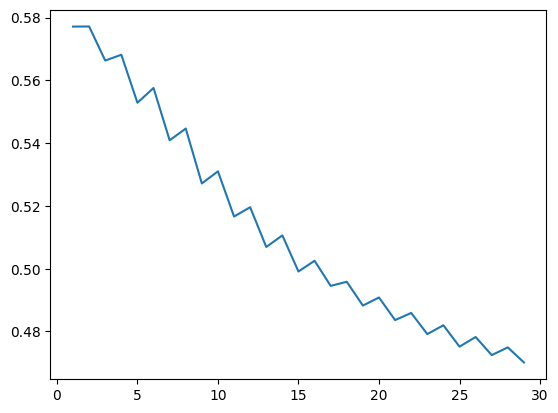

In [ ]:

from tqdm import tqdm

acc = []
for i in tqdm(range(1,10)):

    model = KNeighborsClassifier(n_neighbors=i,weights= 'distance')
    model.fit(X,y)
    y_pred = model.predict(X_ts)
    acc.append(accuracy_score(y_pred,y_ts))
  
  
plt.plot(list(range(1,30)), acc)

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)

In [ ]:
#Creating Pipeline for Machine Learning Models

LogisticRegressionPipeline=Pipeline([('scaler', StandardScaler()),
                                     ('logistic_classifier', LogisticRegression())])


In [ ]:
RandomForestClassifierPipeline=Pipeline([('scaler', StandardScaler()),
                                     ('rf', RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=5,min_samples_split=3))])

params= {
'rf__n_estimators': [120, 140],
'rf__max_depth': [30, 50],
'rf__min_samples_split': [2, 3],
'rf__min_samples_leaf': [3, 5],
'rf__class_weight': [{0: 1, 1: 1}, {0: 1, 1:5},{0:1,1:3}, 'balanced']}

#rf_cv=GridSearchCV(RandomForestClassifierPipeline,param_grid=params ,scoring = 'roc_auc', cv = 3)
#rf_cv.fit(xtr, ytr)

In [ ]:
SVMPipeline=Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(gamma="scale",C=5))])

In [ ]:
XGBClassifierPipeline=Pipeline([('scaler', StandardScaler()),
                      ('model', XGBClassifier( gamma= 4.198875359789924, max_depth= 17, min_child_weight= 1, reg_alpha= 57))])

In [ ]:
GradientBoostingClassifierPipeline=Pipeline([('scaler', StandardScaler()),
                                             ('gbc', GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10))])

In [ ]:
mypipeline=[LogisticRegressionPipeline, RandomForestClassifierPipeline, SVMPipeline, XGBClassifierPipeline, GradientBoostingClassifierPipeline]

In [ ]:
mypipeline=[LogisticRegressionPipeline, RandomForestClassifierPipeline, SVMPipeline, XGBClassifierPipeline, GradientBoostingClassifierPipeline]
for mypipe in mypipeline:
    mypipe.fit(X_train,y_train)
    cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
    scores = cross_val_score(mypipe, X_train, y_train, cv=cv)
    print("{} Test Acurracy: {}".format(mypipe[1], max(scores)))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression() Test Acurracy: 0.9354201639182383
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=3) Test Acurracy: 0.9228300582600968
SVC(C=5) Test Acurracy: 0.9596622889305816
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.198875359789924, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=17,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...) Test Acurracy: 0.95758862446924

In [ ]:
df_test.drop(col)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(96446, 22)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=15,
                          validation_data=(X_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)   

print(classification_report(y_test, y_pred))